# Deep Learning

# Artificial Neural Networks

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("D:/Projects/Datasets/Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X=data.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
y=data.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [8]:
## Drop columns
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [12]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [13]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,-0.569844,1.743090,-1.091687


In [14]:
#Deep Learning Model

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU,Dropout


Using TensorFlow backend.


In [16]:
classifier = Sequential()

In [17]:
classifier.add(Dense(units=6,activation="relu",kernel_initializer='he_uniform',input_dim=11))
classifier.add(Dense(units=6,activation="relu",kernel_initializer='he_uniform'))

In [18]:
classifier.add(Dense(units=1,activation="sigmoid",kernel_initializer="glorot_uniform"))

In [19]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [21]:
model_his=classifier.fit(X_train,y_train,validation_split=0.30, batch_size=10,epochs=100,verbose=1)

Train on 5600 samples, validate on 2400 samples
Epoch 1/100
5600/5600 [==============================] - 1s 220us/step - loss: 0.5819 - accuracy: 0.7066 - val_loss: 0.4936 - val_accuracy: 0.7958
Epoch 2/100
5600/5600 [==============================] - 1s 153us/step - loss: 0.4652 - accuracy: 0.7980 - val_loss: 0.4615 - val_accuracy: 0.7975
Epoch 3/100
5600/5600 [==============================] - 1s 144us/step - loss: 0.4448 - accuracy: 0.7998 - val_loss: 0.4514 - val_accuracy: 0.7946
Epoch 4/100
5600/5600 [==============================] - 1s 153us/step - loss: 0.4349 - accuracy: 0.8030 - val_loss: 0.4446 - val_accuracy: 0.7954
Epoch 5/100
5600/5600 [==============================] - 1s 140us/step - loss: 0.4277 - accuracy: 0.8030 - val_loss: 0.4386 - val_accuracy: 0.7958
Epoch 6/100
5600/5600 [==============================] - 1s 159us/step - loss: 0.4213 - accuracy: 0.8059 - val_loss: 0.4326 - val_accuracy: 0.7971
Epoch 7/100
5600/5600 [==============================] - 1s 150us/step

In [22]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred > 0.60)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score


0.8635

In [24]:

# Making the Confusion Matrixion_re
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1567   28]
 [ 245  160]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1595
           1       0.85      0.40      0.54       405

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



In [26]:
1544/(1544+227)

0.8718238283455675

In [27]:
1544/(1544+51)

0.9680250783699059

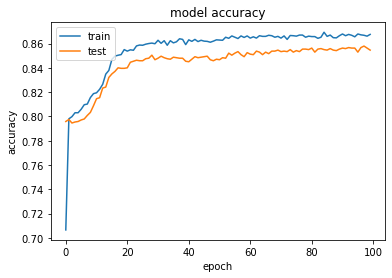

In [28]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
print(model_his.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


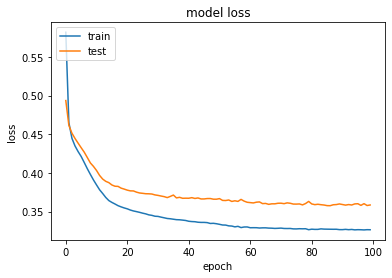

In [30]:
# summarize history for loss
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
#HyperParameter Tuning

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras import Sequential
from keras.layers import Activation,Dense,Flatten,ReLU,Dropout

In [40]:
layers =[(10),(40,20),(45,30,15)]
activation=['sigmoid','relu']

paramgrid =dict(layers=layers,activation=activation,batch_size=[100,250],epochs=[35])

In [41]:
def model_creation(layers,activation):
    model=Sequential()
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(units=nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(units=nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    
    model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation= "sigmoid"))
    
    model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
    
    return model

In [45]:
model=KerasClassifier(build_fn=model_creation,verbose=1)


In [46]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,cv=5,param_grid=paramgrid,n_jobs=-1)

In [47]:
grid_result=grid.fit(X_train,y_train)

Epoch 1/35
8000/8000 [==============================] - 0s 36us/step - loss: 0.6135 - accuracy: 0.6956
Epoch 2/35
8000/8000 [==============================] - 0s 17us/step - loss: 0.4963 - accuracy: 0.7904
Epoch 3/35
8000/8000 [==============================] - 0s 16us/step - loss: 0.4756 - accuracy: 0.7951
Epoch 4/35
8000/8000 [==============================] - 0s 15us/step - loss: 0.4654 - accuracy: 0.7959
Epoch 5/35
8000/8000 [==============================] - 0s 15us/step - loss: 0.4546 - accuracy: 0.7989
Epoch 6/35
8000/8000 [==============================] - 0s 15us/step - loss: 0.4501 - accuracy: 0.8004
Epoch 7/35
8000/8000 [==============================] - 0s 15us/step - loss: 0.4444 - accuracy: 0.8060
Epoch 8/35
8000/8000 [==============================] - 0s 15us/step - loss: 0.4383 - accuracy: 0.8124
Epoch 9/35
8000/8000 [==============================] - 0s 15us/step - loss: 0.4260 - accuracy: 0.8142
Epoch 10/35
8000/8000 [==============================] - 0s 15us/step - l